<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-признаков" data-toc-modified-id="Переименование-признаков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Переименование признаков</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Определение-качества-модели-при-нешифрованных-данных" data-toc-modified-id="Определение-качества-модели-при-нешифрованных-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение качества модели при нешифрованных данных</a></span></li><li><span><a href="#Определение-качества-модели-после-умножения-признаков-на-обратимую-матрицу" data-toc-modified-id="Определение-качества-модели-после-умножения-признаков-на-обратимую-матрицу-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Определение качества модели после умножения признаков на обратимую матрицу</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Создание-&quot;ключей&quot;" data-toc-modified-id="Создание-&quot;ключей&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание "ключей"</a></span></li><li><span><a href="#Кодирование-информации" data-toc-modified-id="Кодирование-информации-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Кодирование информации</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Описание проекта

Необходимо защитить данные путём разработки такого метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Корректность работы должна быть обоснована.

Защита данных не должна сказываться на качестве моделей машинного обучения. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

## Загрузка данных

In [22]:
data = pd.read_csv('...')   # загрузка датафрейма

In [23]:
data.info()               # вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


**Вывод**

Пропуски отсутствуют и тип данных у всех признаков верный. 

### Переименование признаков

Для лучшего восприятия решено было оставить названия признаков кириллицей, однако пробелы в названиях необходимо убрать, поскольку с пробелами возникают проблемы при вызове методов (в часности метод .query()). 

In [24]:
data = data.rename(columns={'Страховые выплаты': 'Страховые_выплаты', 'Члены семьи': 'Члены_семьи'}) # переименование опреде-
# лённых столбцов

## Умножение матриц

### Определение качества модели при нешифрованных данных

In [25]:
features = data.drop('Страховые_выплаты', axis=1)                              # признаки
target = data['Страховые_выплаты']                                             # целевой признак
features_train, features_valid, target_train, target_valid = train_test_split( # разбиение на обучающую и валидационную выборку
    features, target, test_size=0.25, random_state=12345)
model = LinearRegression()                                                     # выбираем модель линейной регрессии
model.fit(features_train, target_train)                                        # обучаем на обучающей выборке
predictions = model.predict(features_valid)                                    # строим предсказания по признакам валидационной
# выборки
print(f'Параметры модели регресcии: {model.coef_}')   # выводим коэффициенты при признаках в функции линейной регрессии
print('R2 модели регресии на валидационной выборке: ', r2_score(target_valid, predictions))

Параметры модели регресcии: [ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]
R2 модели регресии на валидационной выборке:  0.43522757127026546


### Определение качества модели после умножения признаков на обратимую матрицу

In [26]:
vector = np.random.normal(3, 3, size=(features.shape[1], features.shape[1]))   # создание квадратной матрицы, заполненной по
# нормальному распределению с дисперсией и мат. ожиданием, равными 3
np.linalg.inv(vector)                                                          # проверка матрицы на обратимость

new_features = features.dot(vector)                                            # умножение признаков на обратимую матрицу
new_features.columns = features.columns                                        # перенос названий признаков в новый датафрейм
target = data['Страховые_выплаты']

features_train, features_valid, target_train, target_valid = train_test_split( # разбиение новых признаков и целевого признака  
    new_features, target, test_size=0.25, random_state=12345)                # на обучающую и валидационную выборкт
model = LinearRegression()                                                   # выбираем модель линейной регрессии
model.fit(features_train, target_train)                                      # обучаем на обучающей преобразованной выборке
print(f'Параметры модели регрессии, умноженные на обратимую матрицу {vector.dot(np.array((model.coef_)))}')
predictions = model.predict(features_valid)  # строим предсказания по признакам валидационной выборки
print('R2 модели регрессии на валидационной выборке после умножения на обратим. матр: ', r2_score(target_valid, predictions))


Параметры модели регрессии, умноженные на обратимую матрицу [ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]
R2 модели регрессии на валидационной выборке после умножения на обратим. матр:  0.4352275712704624


In [31]:
display(vector.T.dot(features.T).dot(features).dot(vector))

array([[ 2.38056244e+14,  8.19273190e+13,  2.30924398e+13,
        -1.73860647e+14],
       [ 8.19273190e+13,  2.81953790e+13,  7.94728845e+12,
        -5.98343412e+13],
       [ 2.30924398e+13,  7.94728845e+12,  2.24006220e+12,
        -1.68652003e+13],
       [-1.73860647e+14, -5.98343412e+13, -1.68652003e+13,
         1.26976436e+14]])

**Вывод**

Качество линейной регрессии не изменяется после умножения признаков на обратимую матрицу $A$. Параметры модели в преобразованной задаче и исходной связаны следующим соотношением:
$$
w = Aw'
$$

**Обоснование:** Запишем формулу обучения с учётом умножения на обратимую матрицу $A$:
$$
w' = ((XA)^T (XA))^{-1} (XA)^T y
$$
Раскрываем скобки:
$$
w' = (A^T X^T XA)^{-1} (A^T X^T) y = (A^T (X^T X) A)^{-1} (A^T X^T) y = 
$$

$$
=A^{-1} (A^T (X^T X))^{-1}(A^T X^T) y = A^{-1} (X^T X)^{-1}\underline{(A^T)^{-1}A^T} X^Ty = A^{-1} (X^T X)^{-1}X^Ty = A^{-1}w
$$




Здесь мы использовали следующие выражения:
$$
(XA)^T = A^T X^T
$$

$$
(A^T)^{-1}A^T = E
$$
В итоге получим, что:
$$
w= Aw'
$$

## Алгоритм преобразования

Как было показано ранее, хорошим способом кодировки, при котором качество предсказаний не изменяется, является умножение матрицы признаков на обратимую матрицу. 

Что касается вектора целевого признака, то его тоже можно замаскировать: прибавить ко всему вектору случайное число и умножить на случайное число. Метрика R2 к такой операции не чувствительна.

**Алгоритм**


1. Тот, кто должен скрыть личную информацию создаёт обратимую $A$ матрицу и два случайных числа ${a,b}$ и хранит их у себя. Матрица $A$ должна быть заполнена случайно сгенерированными числами.

2. Умножаем матрицу признаков на $A$ и получаем преобразованную матрицу признаков $X'$. Прибавляем к целевому признаку $y$ число $a$, а затем умножаем на $b$, получаем преобразованный целевой признак $y'$.

3. Проводим обучение с новой матрицей признаков. Делаем предсказания целевого признака $y'$.

4. Предсказания и величину метрики передаём хранителю "ключей". Он делает обратные операции с целевым признаком и числами ${a,b}$ и получает реальные значения предсказанного целевого признака.
   

**Обоснование**

Обоснование, почему умножение признаков на обратимую матрицу не влияет на точность предсказания описано в предыдущем пункте.

Обоснование, почему простые операции прибавления числа и умножения на число исходного целевого признака не влияют на качество модели кроется в определении метрики, за которой мы следим.

Если мы прибавляем число к целевому признаку, то после обучения модели параметр регрессии $w_0$ увеличится на это число и итоговые предсказания также увеличатся на это число. Метрика R2 определяется как:

$$
R2 = 1 - MSE_{модели}/MSE_{среднего}
$$

А MSE, в свою очередь представляется:
$$
MSE = \frac{\sum{(Предсказание\:модели - правильный\:ответ)^2}}{Количество\:объектов}
$$

Поскольку и правильный ответ и предсказания смещены на одну и ту же величину качество предсказания не меняется.

Что касается умножения целевого признака на число $b$, то это приводит к умножению всех коэффициентов линейной регрессии на это число. Соответственно и предсказания будут отличаться в $b$ раз. Из определения MSE видно, что эта метрика вырастет в $b^2$ раз, а вот метрика R2 останется прежней, ведь если $MSE_{модели}$ будет завышено в $b^2$ раз, то и $MSE_{среднего}$ тоже завысится в $b^2$ раз.

## Проверка алгоритма

### Создание "ключей"

In [28]:
matrix = np.random.normal(3, 3, size=(features.shape[1], features.shape[1])) # создание квадратной матрицы, заполненной по
# нормальному распределению с дисперсией и мат. ожиданием, равными 3
np.linalg.inv(matrix)                                                # проверка матрицы на обратимость
[a,b] = [np.random.rand(1) - 0.5,np.random.rand(1) - 0.5]            # создание случайных чисел а и b

### Кодирование информации

Преобразованные признаки:


,Пол,Возраст,Зарплата,Члены_семьи
0,98752.706242,-13739.294907,-74513.632112,58484.892246
1,75720.686897,-10497.451094,-57039.772526,44863.514434
2,41859.779819,-5797.639719,-31510.813472,24805.277323
3,82958.748277,-11571.305980,-62689.576282,49116.869442
4,51996.504535,-7219.783889,-39188.667545,30800.922534


Преобразованный целевой признак:


0   -0.177370
1    0.207097
2   -0.177370
3   -0.177370
4   -0.177370
Name: Страховые_выплаты, dtype: float64

Закодированное распределение по полам:


<AxesSubplot:>

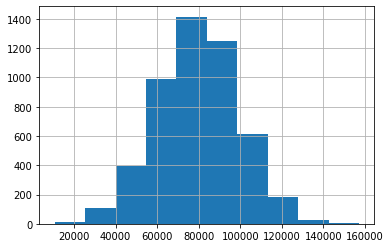

In [29]:
new_features = features.dot(matrix)                                 # умножение признаков на обратимую матрицу
new_features.columns = features.columns                             # перенос названий признаков в новый датафрейм
new_target = ((data['Страховые_выплаты']) + a) * b                  # кодирование целевого признака
print('Преобразованные признаки:')
display(new_features.head())
print('Преобразованный целевой признак:')
display(new_target.head())
print('Закодированное распределение по полам:')
new_features['Пол'].hist()

**Вывод**

Данные закодированы, из распределения по полам и не догадаешься, что это за признак, однако, видно, что в качестве "ключа" использовалось нормальное распределение.

### Обучение модели

In [30]:
features = data.drop('Страховые_выплаты', axis=1)                            # исходные признаки
target = data['Страховые_выплаты']                                           # исходный целевой признак
features_train, features_valid, target_train, target_valid = train_test_split(   # разбиение исходного датафрейма на обуч.
    features, target, test_size=0.25, random_state=12345)                         # валидационную выборки
model = LinearRegression()                                                   # модель линейной регрессии
model.fit(features_train, target_train)                                      # обучение
predictions = model.predict(features_valid)                                  # построение предсказаний
print('                        До преобразования')
print('R2 модели регрессии на валидационной выборке до преобразования: ', r2_score(target_valid, predictions))
print('MSE модели регрессии на валидационной выборке до преобразования: ', mean_squared_error(target_valid, predictions))
print(f'Параметры модели регрессии: {model.coef_}')
print(f'Сдвиг модели регрессии: {model.intercept_}')
print(f'Предсказания: {predictions}')
print()

features_train, features_valid, target_train, target_valid = train_test_split(   # разбиение преобразованного датафрейма на 
    new_features, new_target, test_size=0.25, random_state=12345)                # обуч. и валид. выборки
model = LinearRegression()                                                       # модель линейной регрессии
model.fit(features_train, target_train)                                          # обучение
predictions = model.predict(features_valid)                                      # построение предсказаний
print('                        После преобразования')
print('R2 модели регрессии на валидационной выборке после преобразования: ', r2_score(target_valid, predictions))
print('MSE модели регрессии на валидационной выборке после преобразования: ', mean_squared_error(target_valid, predictions))
print(f'Параметры модели регрессии: {(np.array((model.coef_)))}')
print(f'Сдвиг модели регрессии: {model.intercept_}')                            # вывод смещения модели
print(f'Предсказания: {predictions}')                                           # вывод предсказаний модели в закодированном 
# виде
print()

print('                        После раскодировки')
print(f'Параметры модели регрессии: {matrix.dot(np.array((model.coef_)))/b}')  # вывод коэффицентов при признаках в функции
#  регрессии после раскодирования
print(f'Сдвиг модели регрессии: {model.intercept_/b - a}')                     # вывод смещения модели после раскодирования
print(f'Предсказания: {predictions/b - a}')                                    # вывод предсказаний модели после раскодирования


                        До преобразования
R2 модели регрессии на валидационной выборке до преобразования:  0.43522757127026546
MSE модели регрессии на валидационной выборке до преобразования:  0.11660517472525592
Параметры модели регрессии: [ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]
Сдвиг модели регрессии: -0.9321366751690725
Предсказания: [0.17494798 0.80523476 0.45599281 ... 0.3129923  0.34926113 0.7886826 ]

                        После преобразования
R2 модели регрессии на валидационной выборке после преобразования:  0.43522757127024403
MSE модели регрессии на валидационной выборке после преобразования:  0.017235943319824597
Параметры модели регрессии: [-0.00056405 -0.00291607  0.00249332  0.0034535 ]
Сдвиг модели регрессии: -0.5357454969258062
Предсказания: [-0.11010843  0.13221579 -0.00205607 ... -0.05703499 -0.04309084
  0.12585204]

                        После раскодировки
Параметры модели регрессии: [ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.

**Вывод**

Качество предсказаний после указанных преобразований не изменилось (метрика R2).

### Общий вывод

Задача состояла в преобразовании персональной информации с помощью матричных операций. В качестве персональной информации выступали признаки, которые впоследствие используются при построении модели МО. Исходя из формулы линейной регрессии, было доказано, что умножение матрицы признаков на обратимую матрицу $A$ не влияет на качество предсказаний, сами предсказания при этом тоже не меняются.

Это свойство было взято за основу алгоритма шифрования персональных данных. Алгоритм дополнен преобразованием целевого признака. В итоге для шифрования признаков используется обратимая матрица $A$, а для целевого признака - два числа ${a,b}$.

Проверка алгоритма показала, что качество предсказаний (метрика $R2$) не меняется после преобразования. Знание двух чисел ${a,b}$ позволяет впоследствие восстановить целевой признак. Если же нас интересовала другая метрика качества, то принцип кодировки целевого признака пришлось бы изменить.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования